In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
import plotly.express as px

import plotly
from plotly.graph_objs import Scatter, Line, Layout

import importlib
import json
 
from plotly.subplots import make_subplots
import plotly.graph_objects as go


### csv_read

In [11]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000.0


In [12]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul.head(3)

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구


#### 1월 데이터 가공

In [13]:
adstrd_code_01 = card_01['adstrd_code']
mrhst_induty_cl_code_01 = card_01['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_01:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_01:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card01 = {"receipt_dttm" : card_01['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_01['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_01['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_01['selng_cascnt'], "salamt" : card_01['salamt']}

df_card01 = pd.DataFrame(data_card01)
df_card01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,11740,성내3동,70,약국,463,5843230.0
1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,20200104,11740,성내3동,70,의원,339,9267240.0
4,20200104,11740,성내3동,61,자동차정비,19,4441000.0


In [14]:
df_card01['mrhst_induty_cl_code'].value_counts()
code = []
for i in df_card01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code)
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95]
35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [15]:
seoul01 = []
seoul01_sum = []

is_code = df_card01['adstrd_code'] == 11170

for i in code:
    is_name = df_card01['mrhst_induty_cl_code'] == i
    seoul = df_card01[is_code & is_name]
    seoul01.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul01_sum.append(sum_num)
    
seoul01[0]
print(seoul01_sum)
print(code)

mean = []

for i in seoul01_sum:
    mean.append(i/28)

Jongrogu01 = pd.DataFrame({'code' : code, 'total_sum' : seoul01_sum, 'mean' : mean})
Jongrogu01

[6939, 315, 5434, 23659, 109864, 193, 13613, 195, 6375, 588, 7294423, 615129, 6498, 24, 5851, 8144, 2017, 12488, 161, 7740, 26587, 90436, 28604, 909622, 5614, 2831, 326636, 694, 1142, 281406, 3046, 678, 0, 1, 9799]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,6939,247.821429
1,11,315,11.250000
2,20,5434,194.071429
3,21,23659,844.964286
4,22,109864,3923.714286
5,30,193,6.892857
6,31,13613,486.178571
7,32,195,6.964286
8,33,6375,227.678571
9,34,588,21.000000


### 상대값 = {(n월 평균 - 1월 평균)/(1월 평균)} * 100

### 2월 데이터 가공

In [16]:
adstrd_code_02 = card_02['adstrd_code']
mrhst_induty_cl_code_02 = card_02['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_02:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_02:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card02 = {"receipt_dttm" : card_02['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_02['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_02['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_02['selng_cascnt'], "salamt" : card_02['salamt']}

df_card02 = pd.DataFrame(data_card02)
df_card02.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


#### 2월 상반기

In [17]:
is_date = df_card02['receipt_dttm'] < 20200215
df_card02_1 = df_card02[is_date]
df_card02_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


In [18]:
seoul02_1 = []
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11170

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul02_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean = []

for i in seoul02_sum_1:
    mean.append(i/14)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_1, 'mean' : mean})
Jongrogu02_1

[2547, 178, 1080, 7865, 28665, 158, 2861, 115, 4039, 326, 1655364, 405506, 1989, 14, 2155, 3741, 731, 3280, 102, 3108, 16491, 24813, 6693, 184597, 1018, 714, 60237, 270, 841, 80367, 1130, 450, 0, 1, 3694]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,2547,181.928571
1,11,178,12.714286
2,20,1080,77.142857
3,21,7865,561.785714
4,22,28665,2047.500000
5,30,158,11.285714
6,31,2861,204.357143
7,32,115,8.214286
8,33,4039,288.500000
9,34,326,23.285714


### 1월&2월(상반기) 평균 비교

In [19]:
per_02_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_02_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_1.append(-1)
per_02_1

[-26.588845654993527,
 13.015873015873009,
 -60.25027603974973,
 -33.51367344350986,
 -47.81730139081046,
 63.730569948186535,
 -57.9666495261882,
 17.948717948717935,
 26.713725490196083,
 10.884353741496595,
 -54.61288713308784,
 31.844214790718688,
 -38.78116343490304,
 16.666666666666675,
 -26.337378225944292,
 -8.128683693516688,
 -27.516113039167085,
 -47.46957078795644,
 26.70807453416149,
 -19.689922480620158,
 24.053108662128093,
 -45.125834844530935,
 -53.20234932177318,
 -59.412371292690814,
 -63.73352333452085,
 -49.55845990815966,
 -63.116741571657755,
 -22.19020172910663,
 47.285464098073554,
 -42.881814886676196,
 -25.804333552199616,
 32.74336283185841,
 -1,
 100.0,
 -24.604551484845402]

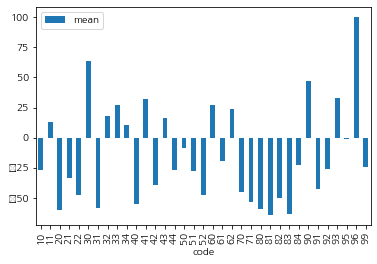

In [20]:
data_02_1 = pd.DataFrame({"code": code, "mean": per_02_1})
data_02_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

#### 2월 하반기

In [21]:
is_date = df_card02['receipt_dttm'] > 20200214
df_card02_2 = df_card02[is_date]
df_card02_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,20200215,11260,망우본동,70,약국,394,6041060.0


In [22]:
seoul02_2 = []
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11170

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul02_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_2.append(sum_num)
    
seoul02_2[0]
print(seoul02_sum_2)
print(code)

mean = []

for i in seoul02_sum_2:
    mean.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean})
Jongrogu02_2

[5832, 375, 2704, 18370, 69754, 372, 6712, 312, 9565, 797, 4227155, 1091585, 4277, 46, 5333, 7539, 2799, 7664, 334, 7775, 40870, 57861, 14798, 446115, 3062, 1837, 142919, 570, 2080, 317640, 2687, 1045, 0, 1, 11677]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,5832,388.800000
1,11,375,25.000000
2,20,2704,180.266667
3,21,18370,1224.666667
4,22,69754,4650.266667
5,30,372,24.800000
6,31,6712,447.466667
7,32,312,20.800000
8,33,9565,637.666667
9,34,797,53.133333


### 1월 & 2월(하반기) 평균 비교

In [23]:
per_02_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_02_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_2.append(-1)
per_02_2

[56.88715953307393,
 122.22222222222223,
 -7.113237639553429,
 44.93709229750485,
 18.516954295007153,
 259.79274611398966,
 -7.962486838561188,
 198.66666666666666,
 180.07320261437906,
 153.015873015873,
 8.17427688705924,
 231.25171034585154,
 22.864471119318754,
 257.77777777777777,
 70.14071668660628,
 72.79960707269157,
 159.03817550818044,
 14.559043348281017,
 287.2463768115942,
 87.51076658053402,
 186.94725492408568,
 19.42943075766289,
 -3.429823334731741,
 -8.451202807319962,
 1.8121363258520329,
 21.125632874131632,
 -18.324332488356063,
 53.31412103746398,
 239.9883245767659,
 110.70197508226546,
 64.66622893412124,
 187.70894788593904,
 -1,
 86.66666666666667,
 122.4417457563697]

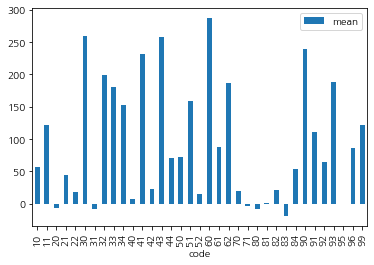

In [24]:
data_02_2 = pd.DataFrame({"code": code, "mean": per_02_2})
data_02_2.plot(x = "code", y = "mean", kind = 'bar')

### 3월 데이터 가공

In [25]:
adstrd_code_03 = card_03['adstrd_code']
mrhst_induty_cl_code_03 = card_03['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_03:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_03:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card03 = {"receipt_dttm" : card_03['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_03['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_03['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_03['selng_cascnt'], "salamt" : card_03['salamt']}

df_card03 = pd.DataFrame(data_card03)
df_card03.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


### 3월 상반기

In [26]:
is_date = df_card03['receipt_dttm'] < 20200316
df_card03_1 = df_card03[is_date]
df_card03_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


In [27]:
seoul03_1 = []
seoul03_sum_1 = []

is_code = df_card03_1['adstrd_code'] == 11170

for i in code:
    is_name = df_card03_1['mrhst_induty_cl_code'] == i
    seoul = df_card03_1[is_code & is_name]
    seoul03_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_1.append(sum_num)
    
print(seoul03_sum_1)
print(code)

mean = []

for i in seoul03_sum_1:
    mean.append(i/15)

Jongrogu03_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_1, 'mean' : mean})
Jongrogu03_1

[3620, 212, 2444, 15961, 26998, 423, 6772, 324, 8667, 640, 4176235, 1093129, 3657, 29, 4595, 6847, 533, 7631, 376, 8253, 24274, 57851, 11960, 373778, 2171, 1059, 111236, 392, 2292, 848778, 2740, 736, 0, 6, 10906]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3620,241.333333
1,11,212,14.133333
2,20,2444,162.933333
3,21,15961,1064.066667
4,22,26998,1799.866667
5,30,423,28.200000
6,31,6772,451.466667
7,32,324,21.600000
8,33,8667,577.800000
9,34,640,42.666667


### 1월 & 3월 (상반기) 평균 비교

In [28]:
per_03_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu03_1['mean'][i]
    if(a != 0):
        per_03_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_1.append(-1)
per_03_1


[-2.618052553201711,
 25.629629629629626,
 -16.044657097288678,
 25.93037181058653,
 -54.128498264521,
 309.11917098445593,
 -7.139743872278957,
 210.15384615384613,
 153.77882352941174,
 103.17460317460316,
 6.871217458415389,
 231.7202516328553,
 5.05386272699292,
 125.55555555555557,
 46.59602347177119,
 56.938441388343165,
 -50.67261609651298,
 14.065769805680123,
 335.94202898550725,
 99.03875968992249,
 70.42715111395293,
 19.408790009878075,
 -21.950309979956177,
 -23.295727969053814,
 -27.813798836242732,
 -30.17308371600142,
 -36.43060368932594,
 5.43707973102786,
 274.6409807355517,
 463.0248111269837,
 67.91420442109869,
 102.63520157325468,
 -1,
 1020.0000000000001,
 107.75453277545328]

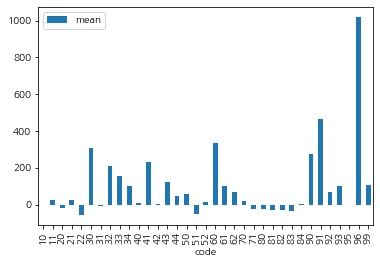

In [29]:
data_03_1 = pd.DataFrame({"code": code, "mean": per_03_1})
data_03_1.plot(x = "code", y = "mean", kind = 'bar')

### 3월 하반기

In [30]:
is_date = df_card03['receipt_dttm'] > 20200315
df_card03_2 = df_card03[is_date]
df_card03_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
376104,20200316,11290,삼선동,10,기타숙박업,12,528000.0
376105,20200316,11680,역삼1동,80,서양음식,5424,70725305.0
376106,20200316,11440,서교동,80,일반한식,4441,131872050.0
376107,20200316,11740,명일2동,40,편 의 점,404,2209050.0
376108,20200316,11380,갈현1동,71,미 용 원,37,1616800.0


In [31]:
seoul03_2 = []
seoul03_sum_2 = []

is_code = df_card03_2['adstrd_code'] == 11170

for i in code:
    is_name = df_card03_2['mrhst_induty_cl_code'] == i
    seoul = df_card03_2[is_code & is_name]
    seoul03_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_2.append(sum_num)
    
seoul03_2[0]
print(seoul03_sum_2)
print(code)

mean = []

for i in seoul03_sum_2:
    mean.append(i/16)

Jongrogu03_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_2, 'mean' : mean})
Jongrogu03_2

[3341, 304, 3121, 15022, 20133, 432, 7791, 361, 8832, 718, 4927871, 1205140, 4432, 55, 5230, 7743, 2516, 7715, 424, 10182, 41090, 69643, 13735, 408586, 1008, 763, 119424, 414, 2361, 303750, 3229, 886, 0, 2, 6555]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3341,208.8125
1,11,304,19.0000
2,20,3121,195.0625
3,21,15022,938.8750
4,22,20133,1258.3125
5,30,432,27.0000
6,31,7791,486.9375
7,32,361,22.5625
8,33,8832,552.0000
9,34,718,44.8750


### 1월 & 3월(하반기) 평균 비교

In [32]:
per_03_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu03_2['mean'][i]
    if(a != 0):
        per_03_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_2.append(-1)
per_03_2

[-15.740740740740744,
 68.88888888888889,
 0.5106735369893202,
 11.114163743184418,
 -67.93057780528655,
 291.70984455958546,
 0.15610078601336624,
 223.97435897435892,
 142.4470588235294,
 113.69047619047619,
 18.22421389601344,
 242.8541005220043,
 19.359803016312704,
 301.0416666666667,
 56.426251922748236,
 66.38322691552064,
 118.29449677739214,
 8.113789237668161,
 360.8695652173913,
 130.21317829457365,
 170.46112761876105,
 34.76408731036314,
 -15.968920430708991,
 -21.393117140966247,
 -68.5785536159601,
 -52.83468738961498,
 -36.016850561481284,
 4.394812680115278,
 261.79947460595446,
 88.89522611458177,
 85.51378857518056,
 128.68731563421827,
 -1,
 250.0,
 17.065516889478516]

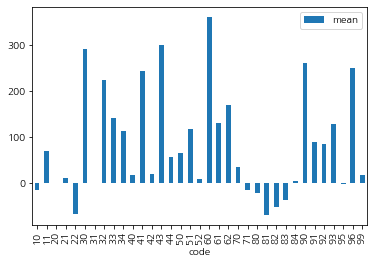

In [33]:
data_03_2 = pd.DataFrame({"code": code, "mean": per_03_2})
data_03_2.plot(x = "code", y = "mean", kind = 'bar')

### 4월 데이터 가공

In [34]:
adstrd_code_04 = card_04['adstrd_code']
mrhst_induty_cl_code_04 = card_04['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_04:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_04:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card04 = {"receipt_dttm" : card_04['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_04['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_04['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_04['selng_cascnt'], "salamt" : card_04['salamt']}

df_card04 = pd.DataFrame(data_card04)
df_card04.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,20200401,11710,가락2동,70,제약회사,7,6700000.0


#### 4월 상반기

In [35]:
is_date = df_card04['receipt_dttm'] < 20200416
df_card04_1 = df_card04[is_date]
df_card04_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,20200401,11710,가락2동,70,제약회사,7,6700000.0


In [36]:
seoul04_1 = []
seoul04_sum_1 = []

is_code = df_card04_1['adstrd_code'] == 11170

for i in code:
    is_name = df_card04_1['mrhst_induty_cl_code'] == i
    seoul = df_card04_1[is_code & is_name]
    seoul04_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_1.append(sum_num)
    
print(seoul04_sum_1)
print(code)

mean = []

for i in seoul04_sum_1:
    mean.append(i/15)

Jongrogu04_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_1, 'mean' : mean})
Jongrogu04_1

[3627, 322, 3218, 13860, 12472, 468, 7123, 409, 8707, 622, 4071906, 1151541, 4444, 49, 5195, 7207, 684, 8032, 457, 10115, 26940, 68244, 12488, 395755, 352, 414, 120387, 431, 2262, 873796, 3327, 773, 0, 4, 9838]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3627,241.800000
1,11,322,21.466667
2,20,3218,214.533333
3,21,13860,924.000000
4,22,12472,831.466667
5,30,468,31.200000
6,31,7123,474.866667
7,32,409,27.266667
8,33,8707,580.466667
9,34,622,41.466667


### 1월&4월(상반기) 평균 비교

In [37]:
per_04_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu04_1['mean'][i]
    if(a != 0):
        per_04_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_1.append(-1)
per_04_1

[-2.429744920017294,
 90.81481481481481,
 10.543491596123166,
 9.35373430829706,
 -78.80919439792228,
 352.6424870466321,
 -2.3266975195279036,
 291.5213675213675,
 154.95006535947712,
 97.46031746031747,
 4.201404278309622,
 249.44592109947666,
 27.661844670154906,
 281.11111111111114,
 65.73805047570215,
 65.18991486574984,
 -36.69806643529995,
 20.05979073243648,
 429.8550724637681,
 143.9448751076658,
 89.14507089931169,
 40.86071918262641,
 -18.504638045960938,
 -18.785752030330542,
 -88.29592684954281,
 -72.70222536206288,
 -31.20096988696898,
 15.926993275696455,
 269.73730297723296,
 479.62014550743993,
 103.887065003283,
 112.82202556538839,
 -1,
 646.6666666666667,
 87.40959961900873]

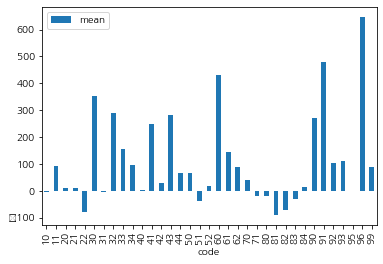

In [38]:
data_04_1 = pd.DataFrame({"code": code, "mean": per_04_1})
data_04_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 4월(하반기) 데이터 가공

In [39]:
is_date = df_card04['receipt_dttm'] > 20200415
df_card04_2 = df_card04[is_date]
df_card04_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
385832,20200416,11710,마천2동,80,일식회집,10,516000.0
385833,20200416,11590,사당1동,44,악세 사리,30,451450.0
385834,20200416,11710,잠실2동,80,일반한식,153,1770930.0
385835,20200416,11170,남영동,70,한의원,8,252000.0
385836,20200416,11680,압구정동,70,의원,169,67386370.0


In [40]:
seoul04_2 = []
seoul04_sum_2 = []

is_code = df_card04_2['adstrd_code'] == 11170

for i in code:
    is_name = df_card04_2['mrhst_induty_cl_code'] == i
    seoul = df_card04_2[is_code & is_name]
    seoul04_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_2.append(sum_num)
    
seoul04_2[0]
print(seoul04_sum_2)
print(code)

mean = []

for i in seoul04_sum_2:
    mean.append(i/15)

Jongrogu04_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_2, 'mean' : mean})
Jongrogu04_2

[3718, 312, 3591, 15669, 14631, 526, 6813, 409, 8694, 705, 4137140, 1034081, 4892, 43, 5488, 7414, 2667, 7364, 491, 9731, 42584, 65340, 14016, 424500, 1458, 606, 130566, 510, 2250, 298550, 3099, 899, 0, 4, 6312]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3718,247.866667
1,11,312,20.800000
2,20,3591,239.400000
3,21,15669,1044.600000
4,22,14631,975.400000
5,30,526,35.066667
6,31,6813,454.200000
7,32,409,27.266667
8,33,8694,579.600000
9,34,705,47.000000


In [41]:
per_04_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu04_2['mean'][i]
    if(a != 0):
        per_04_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_2.append(-1)
per_04_2

[0.018254311380120156,
 84.88888888888889,
 23.356643356643353,
 23.626526903081277,
 -75.14090147819121,
 408.7392055267704,
 -6.577536178652764,
 291.5213675213675,
 154.56941176470588,
 123.80952380952381,
 5.870763641391967,
 213.80158199878943,
 40.53144557299681,
 234.44444444444446,
 75.08574032928844,
 69.93451211525868,
 146.82201289043132,
 10.07473841554559,
 469.2753623188406,
 134.6838931955211,
 198.98120635398254,
 34.86664602591889,
 -8.533072297580759,
 -12.886891477998553,
 -51.5211970074813,
 -60.04238784881668,
 -25.383852361650284,
 37.17579250720462,
 267.7758318739055,
 98.03889516688815,
 89.91464215364411,
 147.51229105211402,
 -1,
 646.6666666666667,
 20.24084090213287]

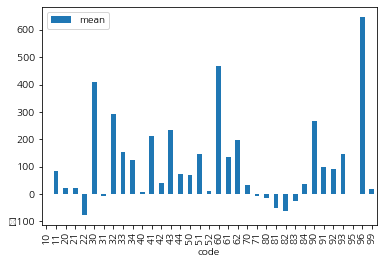

In [42]:
data_04_2 = pd.DataFrame({"code": code, "mean": per_04_2})
data_04_2.plot(x = "code", y = "mean", kind = 'bar')

### 5월 데이터 가공

In [43]:
adstrd_code_05 = card_05['adstrd_code']
mrhst_induty_cl_code_05 = card_05['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_05:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_05:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card05 = {"receipt_dttm" : card_05['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_05['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_05['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_05['selng_cascnt'], "salamt" : card_05['salamt']}

df_card05 = pd.DataFrame(data_card05)
df_card05.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


### 5월 상반기

In [44]:
is_date = df_card05['receipt_dttm'] < 20200516
df_card05_1 = df_card05[is_date]
df_card05_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


In [45]:
seoul05_1 = []
seoul05_sum_1 = []

is_code = df_card05_1['adstrd_code'] == 11170

for i in code:
    is_name = df_card05_1['mrhst_induty_cl_code'] == i
    seoul = df_card05_1[is_code & is_name]
    seoul05_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_1.append(sum_num)
    
print(seoul05_sum_1)
print(code)

mean = []

for i in seoul05_sum_1:
    mean.append(i/15)

Jongrogu05_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_1, 'mean' : mean})
Jongrogu05_1

[9743, 2628, 14880, 37384, 33389, 6981, 12905, 3331, 7492, 7059, 1479656, 297768, 22344, 1189, 23716, 28168, 13499, 16043, 5797, 30630, 1481, 91593, 61198, 303867, 4439, 6859, 107454, 3603, 42432, 63481, 23117, 8806, 0, 5, 84274]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,9743,649.533333
1,11,2628,175.200000
2,20,14880,992.000000
3,21,37384,2492.266667
4,22,33389,2225.933333
5,30,6981,465.400000
6,31,12905,860.333333
7,32,3331,222.066667
8,33,7492,499.466667
9,34,7059,470.600000


### 1월&5월(상반기) 평균 비교

In [46]:
per_05_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu05_1['mean'][i]
    if(a != 0):
        per_05_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_1.append(-1)
per_05_1

[162.09732430225296,
 1457.3333333333333,
 411.15200588884795,
 194.95526719923356,
 -43.26973955678536,
 6651.917098445595,
 76.95829966453636,
 3088.6495726495723,
 119.37359477124186,
 2140.952380952381,
 -62.135119757473156,
 -9.639506510016602,
 541.8713450292397,
 9147.777777777777,
 656.6205207087106,
 545.6319580877538,
 1149.2877210378447,
 139.80568011958147,
 6621.159420289855,
 638.7080103359172,
 -89.60193578315216,
 89.05480118536866,
 299.3716496527293,
 -37.64240530681976,
 47.59767248545303,
 352.25950782997757,
 -38.59194944831555,
 869.106628242075,
 6835.761821366026,
 -57.89078176489959,
 1316.6688553293939,
 2324.464110127827,
 -1,
 833.3333333333334,
 1505.3828621968228]

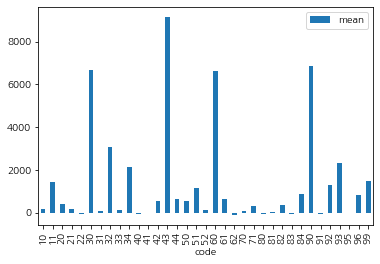

In [47]:
data_05_1 = pd.DataFrame({"code": code, "mean": per_05_1})
data_05_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 5월(하반기) 데이터 가공

In [48]:
is_date = df_card05['receipt_dttm'] > 20200515
df_card05_2 = df_card05[is_date]
df_card05_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
389400,20200516,11680,삼성1동,21,스크린골프,462.0,422000.0
389401,20200516,11650,방배4동,83,미곡상,4949.0,190000.0
389402,20200516,11650,서초4동,21,당구장,276.0,188800.0
389403,20200516,11500,가양1동,40,편 의 점,33.0,30976350.0
389404,20200516,11140,소공동,80,스넥,835.0,5590800.0


In [49]:
seoul05_2 = []
seoul05_sum_2 = []

is_code = df_card05_2['adstrd_code'] == 11170

for i in code:
    is_name = df_card05_2['mrhst_induty_cl_code'] == i
    seoul = df_card05_2[is_code & is_name]
    seoul05_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_2.append(sum_num)
    
seoul05_2[0]
print(seoul05_sum_2)
print(code)

mean = []

for i in seoul05_sum_2:
    mean.append(i/16)

Jongrogu05_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_2, 'mean' : mean})
Jongrogu05_2

[27337, 4147, 18925, 75764, 45699, 7539, 26174, 8202, 10411, 8491, 119240, 3135, 38041, 9304, 50119, 46860, 38171, 30113, 7267, 48198, 282, 124873, 113254, 534112, 173, 7111, 125506, 5810, 102971, 48173, 98418, 16830, 0, 158, 13034]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,27337,1708.5625
1,11,4147,259.1875
2,20,18925,1182.8125
3,21,75764,4735.2500
4,22,45699,2856.1875
5,30,7539,471.1875
6,31,26174,1635.8750
7,32,8202,512.6250
8,33,10411,650.6875
9,34,8491,530.6875


In [50]:
per_05_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu05_2['mean'][i]
    if(a != 0):
        per_05_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_2.append(-1)
per_05_2

[589.4329154056779,
 2203.8888888888887,
 509.47276407802724,
 460.40830128069655,
 -27.207046894342096,
 6735.880829015544,
 236.4761624917358,
 7260.7692307692305,
 185.79215686274512,
 2427.083333333333,
 -97.1393213692159,
 -99.10811390781446,
 924.4959987688519,
 67741.66666666666,
 1399.0300803281489,
 906.9376227897841,
 3211.8120971740204,
 321.98710762331837,
 7798.913043478261,
 989.7480620155038,
 -98.14382969120247,
 141.63800919987614,
 592.8908544259544,
 2.756529635387007,
 -94.6072319201995,
 339.57082303073116,
 -32.758330373871836,
 1365.0576368876082,
 15679.268826619964,
 -70.04230542348067,
 5554.349967170058,
 4244.026548672566,
 -1,
 27550.0,
 132.7737524237167]

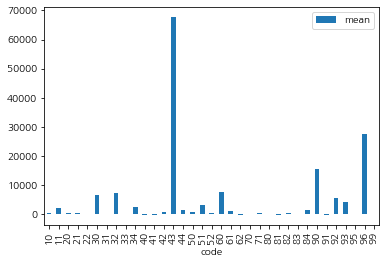

In [51]:
data_05_2 = pd.DataFrame({"code": code, "mean": per_05_2})
data_05_2.plot(x = "code", y = "mean", kind = 'bar')

### 6월 데이터 가공

In [52]:
adstrd_code_06 = card_06['adstrd_code']
mrhst_induty_cl_code_06 = card_06['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_06:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_06:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card06 = {"receipt_dttm" : card_06['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_06['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_06['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_06['selng_cascnt'], "salamt" : card_06['salamt']}

df_card06 = pd.DataFrame(data_card06)
df_card06.head() # 6월은 14알 까지로, 상반기까지만 존재

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200601,11560,대림2동,80,주점,74,5471100
1,20200601,11200,성수2가1동,80,일반한식,429,11876060
2,20200601,11560,신길1동,90,기타건축자재,3,59800
3,20200601,11680,일원본동,40,슈퍼 마켓,145,2293030
4,20200601,11560,양평2동,71,사우나,12,102500


### 6월 상반기 (14일까지)

In [53]:
seoul06 = []
seoul06_sum = []

is_code = df_card06['adstrd_code'] == 11170

for i in code:
    is_name = df_card06['mrhst_induty_cl_code'] == i
    seoul = df_card06[is_code & is_name]
    seoul06.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul06_sum.append(sum_num)
    
print(seoul06_sum)
print(code)

mean = []

for i in seoul06_sum:
    mean.append(i/15)

Jongrogu06 = pd.DataFrame({'code' : code, 'total_sum' : seoul06_sum, 'mean' : mean})
Jongrogu06

[3925, 277, 4007, 14310, 20885, 386, 10194, 450, 9042, 604, 4080772, 821103, 5325, 79, 4772, 7672, 948, 7034, 456, 9812, 26608, 58635, 14800, 389497, 27, 488, 138830, 519, 2437, 925286, 3154, 990, 0, 10, 11310]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3925,261.666667
1,11,277,18.466667
2,20,4007,267.133333
3,21,14310,954.000000
4,22,20885,1392.333333
5,30,386,25.733333
6,31,10194,679.600000
7,32,450,30.000000
8,33,9042,602.800000
9,34,604,40.266667


### 1월&6월(상반기) 평균 비교

In [54]:
per_06 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu06['mean'][i]
    if(a != 0):
        per_06.append( ( ( b - a ) / a ) * 100 )
    else:
        per_06.append(-1)
per_06

[5.586780035547871,
 64.14814814814814,
 37.64691448901974,
 12.904180227397614,
 -64.51491541056822,
 273.3333333333333,
 39.78402997135092,
 330.7692307692308,
 164.7592156862745,
 91.74603174603175,
 4.428288113626907,
 149.1714095742519,
 52.97014465989535,
 514.4444444444445,
 52.24292143793083,
 75.84806810740014,
 -12.265741199801688,
 5.142002989536622,
 428.695652173913,
 136.6373815676141,
 86.81410714509596,
 21.02702463620683,
 -3.4167715471029716,
 -20.06997778564429,
 -99.10224438902743,
 -67.8229129871659,
 -20.6611232891251,
 39.59654178674353,
 298.34208990075894,
 513.7753044829653,
 93.28518275333771,
 172.56637168141592,
 -1,
 1766.6666666666667,
 115.45055617920195]

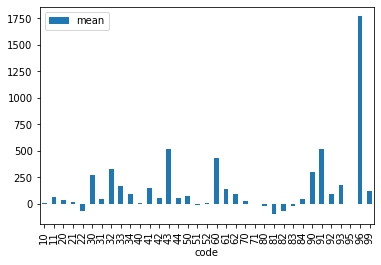

In [92]:
data_06 = pd.DataFrame({"code": code, "mean": per_06})
data_06.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

data 병합(2월초부터 6월까지)

In [101]:
#2_1
df_2_1=pd.DataFrame(code,columns=['code'])
df_2_1['per']=per_02_1
df_2_1['period']='2_1'
df_2_1=df_2_1[['period','code','per']]

#2_2
df_2_2=pd.DataFrame(code,columns=['code'])
df_2_2['per']=per_02_2
df_2_2['period']='2_2'
df_2_2=df_2_2[['period','code','per']]

#3_1
df_3_1=pd.DataFrame(code,columns=['code'])
df_3_1['per']=per_03_1
df_3_1['period']='3_1'
df_3_1=df_3_1[['period','code','per']]

#3_2
df_3_2=pd.DataFrame(code,columns=['code'])
df_3_2['per']=per_03_2
df_3_2['period']='3_2'
df_3_2=df_3_2[['period','code','per']]

#4_1
df_4_1=pd.DataFrame(code,columns=['code'])
df_4_1['per']=per_04_1
df_4_1['period']='4_1'
df_4_1=df_4_1[['period','code','per']]

#4_2
df_4_2=pd.DataFrame(code,columns=['code'])
df_4_2['per']=per_04_2
df_4_2['period']='4_2'
df_4_2=df_4_2[['period','code','per']]

#5_1
df_5_1=pd.DataFrame(code,columns=['code'])
df_5_1['per']=per_05_1
df_5_1['period']='5_1'
df_5_1=df_5_1[['period','code','per']]

#5_2
df_5_2=pd.DataFrame(code,columns=['code'])
df_5_2['per']=per_05_2
df_5_2['period']='5_2'
df_5_2=df_5_2[['period','code','per']]

#6_1
df_6_1=pd.DataFrame(code,columns=['code'])
df_6_1['per']=per_06
df_6_1['period']='6_1'
df_6_1=df_6_1[['period','code','per']]


In [102]:
yongsangu_data=pd.concat([df_2_1,df_2_2,df_3_1,df_3_2,df_4_1,df_4_2,df_5_1,df_5_2,df_6_1],axis=0)

In [105]:
yongsangu_data=yongsangu_data.reset_index()
yongsangu_data=yongsangu_data.drop(['index'],axis=1)
yongsangu_data

,period,code,per
0,2_1,10,-26.588846
1,2_1,11,13.015873
2,2_1,20,-60.250276
3,2_1,21,-33.513673
4,2_1,22,-47.817301
...,...,...,...
310,6_1,92,93.285183
311,6_1,93,172.566372
312,6_1,95,-1.000000
313,6_1,96,1766.666667


In [107]:
fig=px.line(yongsangu_data,x='period',y='per',color='code')
fig.update_layout(
    title={
        'text': "품목별 상대지수 비교(1월 기준, 2월초부터 6월 초까지)",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

35가지 한번에 그린건데 43, 96, 90, 60, 30, 32, 92, 93, 51,34, 11 (11개)이정도가 눈에 띄는듯